# Airbnb NY 2019

## 1) Business Understanding

To help people to better understand Airbnb in NY, I used a dataset available in [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) with 2019 data. The dataset contains 48k rows with Airbnb host’s data.

Why Airbnb? The platform has gained market share by offering cheaper travel rates when compared to hotels. And mainly, for giving travelers a life experience like a local (since most hosts are apartments and rooms that were previously rented)
<br>
<br>

We will use this dataset to awnser 3 questions and help people to better understand Airbnb in NY:

A) How Airbnb hosts are distributed in New York?

B) Finding the top 10 neighbourhoods with the small cost per night in New York Airbnb, for Private Room and Entire Home

C) Grater minimum nights has a small cost per night?

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

In [0]:
# read the .csv with the data

df = pd.read_csv('data.csv')

pd.set_option('display.max_columns', 100)

## 2) Data Understanding

In [0]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [0]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


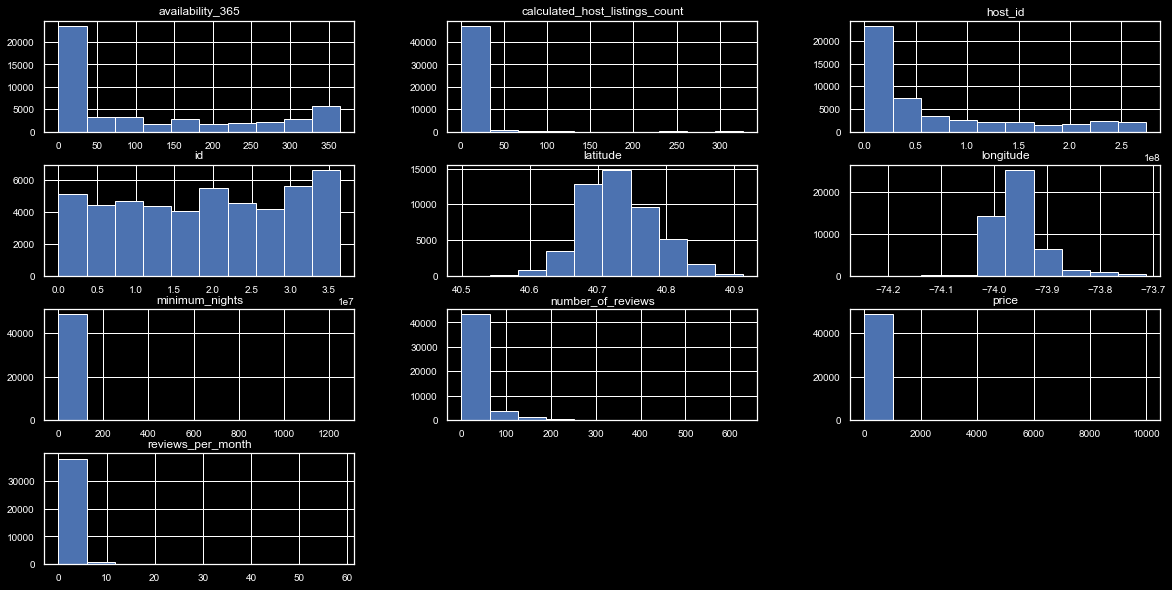

In [0]:
df.hist();

## 3) Prepare Data

In [0]:
# Looking to the df.info() is possible to see that only name, host_name, last_review and reviews_per_month have null atributes
# We will not work with this columns in this project, so we will drop them

df  = df.dropna()

## 4) Data Modeling

#### A) How Airbnb hosts are distributed in New York?

In [0]:
# import street map

street_map = gpd.read_file('geo_export_b4175ce2-9594-4989-aef8-09611ef7eaca.shp')

In [0]:
# designate coordinate system
crs = {'init':'espc:4326'}

# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df,
 crs = crs,
 geometry = geometry)

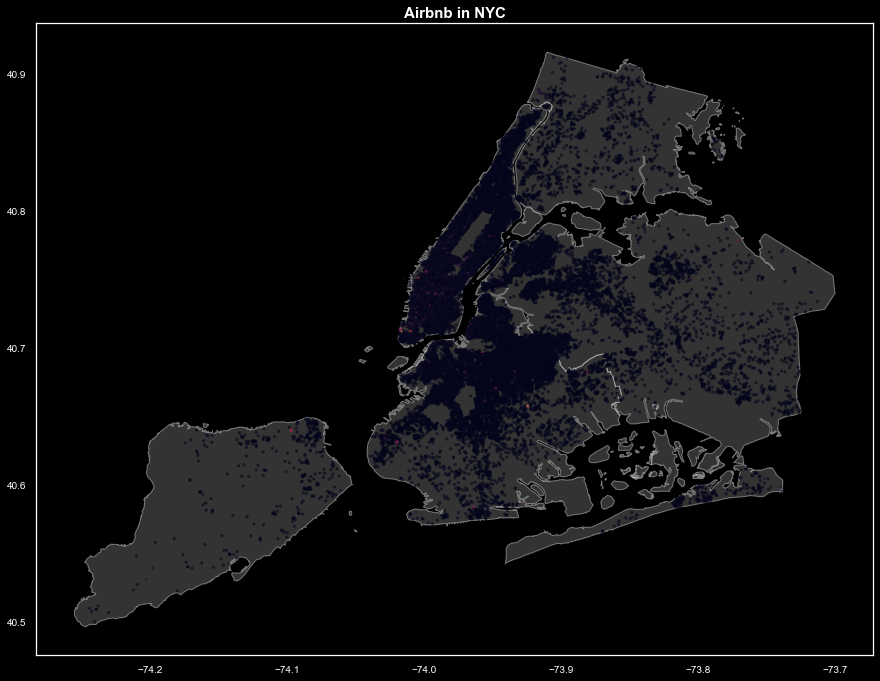

In [0]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))

# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')

# plot points
geo_df.plot(column='price',ax=ax,alpha=0.5, legend=False,markersize=5)

# add title to graph
plt.title('Airbnb in NYC', fontsize=15,fontweight='bold')


# show map
plt.show()

Let’s start by looking the place. If you access Airbnb site, and search for any room ou home, the platform will display only available properties.
By looking all the properties (available or not), we can better understand NY, and this rises some assumptions such as price, availability, proximity to downtown, etc.

#### B) Finding the top 10 neighbourhoods with the small cost per night in New York Airbnb, for Private Room and Entire Home

In [0]:
def pivotData(dataframe, column, value, aggfunc, column_filter, value_filter):
  """
  This function creates a pivot table with the params:

  dataframe - table to be pivoted

  column - group by colomun

  value - number to be ranked (ascending)

  aggfunc - how the number must be manipulated

  column_filter - group only specific rows

  value_filter - value to filter spefic rows

  """

  # filter dataframe
  new_df_part = dataframe.loc[dataframe[column_filter] == value_filter]

  # povot it
  new_df = pd.pivot_table(new_df_part, values = value, columns = column, aggfunc=aggfunc).reset_index()

  # drop index column generated by last function
  new_df = new_df.drop(['index'], axis=1)

  # create value_name
  value_name = aggfunc + "_" + value

  # convert pivot columns to rows
  new_df = new_df.melt(var_name=column, value_name=value_name)

  # organize the rows in ascending order
  new_df = new_df.sort_values([value_name], ascending=[True])

  return new_df

In [0]:
private_room_med = pivotData(df, 'neighbourhood', 'price', 'median', 'room_type', 'Private room')

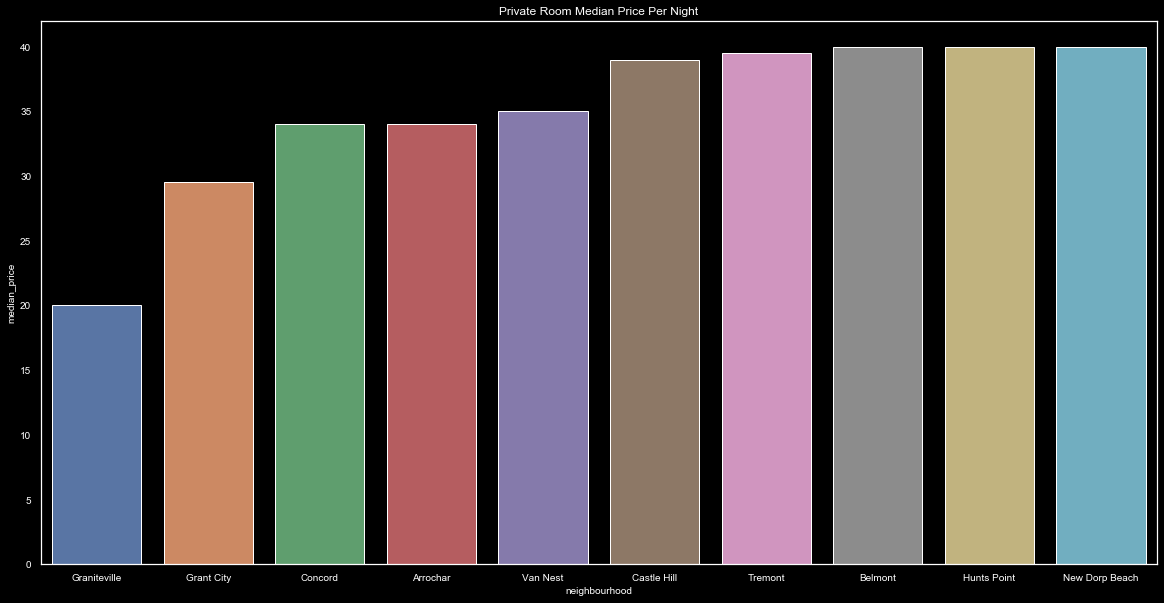

In [0]:
bg_color = 'black'

sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":False,
            'axes.labelsize':10,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':10,
            'font.size':10,
            'ytick.labelsize':10})

plot_1 = sns.barplot(data= private_room_med.head(10), x= 'neighbourhood', y= 'median_price').set_title('Private Room Median Price Per Night')

In [0]:
entire_room_med = pivotData(df, 'neighbourhood', 'price', 'median', 'room_type', 'Entire home/apt')

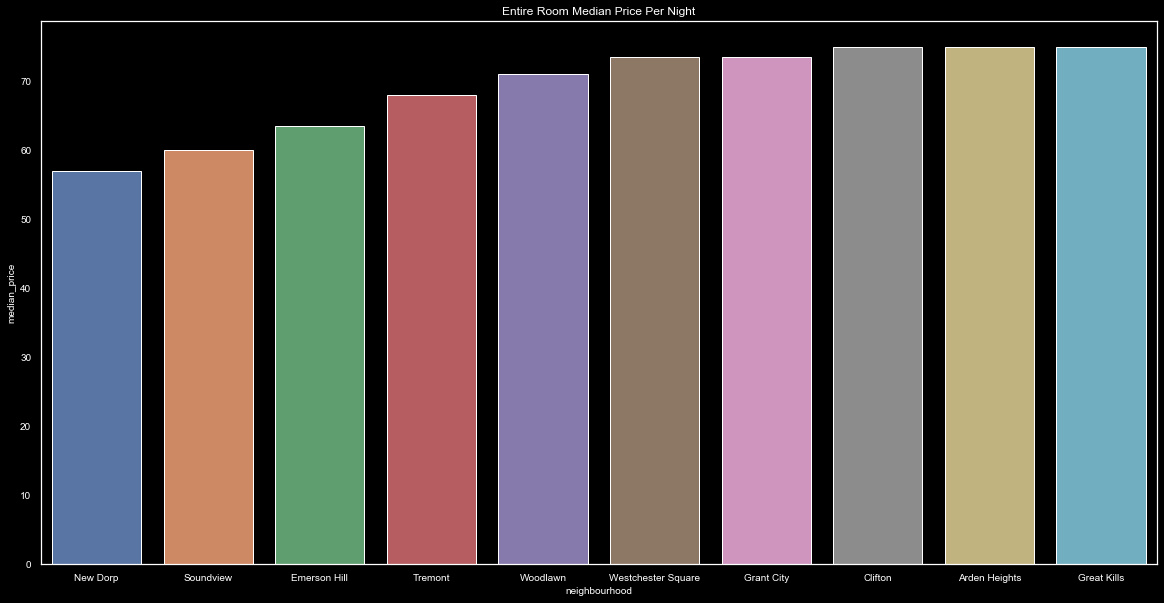

In [0]:
bg_color = 'black'

sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":False,
            'axes.labelsize':10,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':10,
            'font.size':10,
            'ytick.labelsize':10})

plot_2 = sns.barplot(data= entire_room_med.head(10), x= 'neighbourhood', y= 'median_price').set_title('Entire Room Median Price Per Night')

As expected, most of the neighborhoods are far from downtown. So, there is a tradeoff: stay closer from center or pay less?

Also is possible to see the price diference between Entire Room (starting at 58) or Private Room (starting at 20).

### C) Grater minimum nights has a small cost per night?

In [0]:
def price_vs_availability(dataframe, column_1, column_2):
  '''
  INPUT:
  Dataframe - dataframe containing column_1 and column_2
  Column_1 = feature X to be normalized
  Column_2 = feature y to be normalized

  Output:
  A dataframe with X and Y normalized
  '''

  #normalize
  x = dataframe[[column_1, column_2]]
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  df_norm = pd.DataFrame(x_scaled)

  return df_norm

In [0]:
df_norm = price_vs_availability(df, 'price', 'minimum_nights')

In [0]:
df_norm = df_norm.rename(columns={0: 'price', 1: 'minimum_nights'})

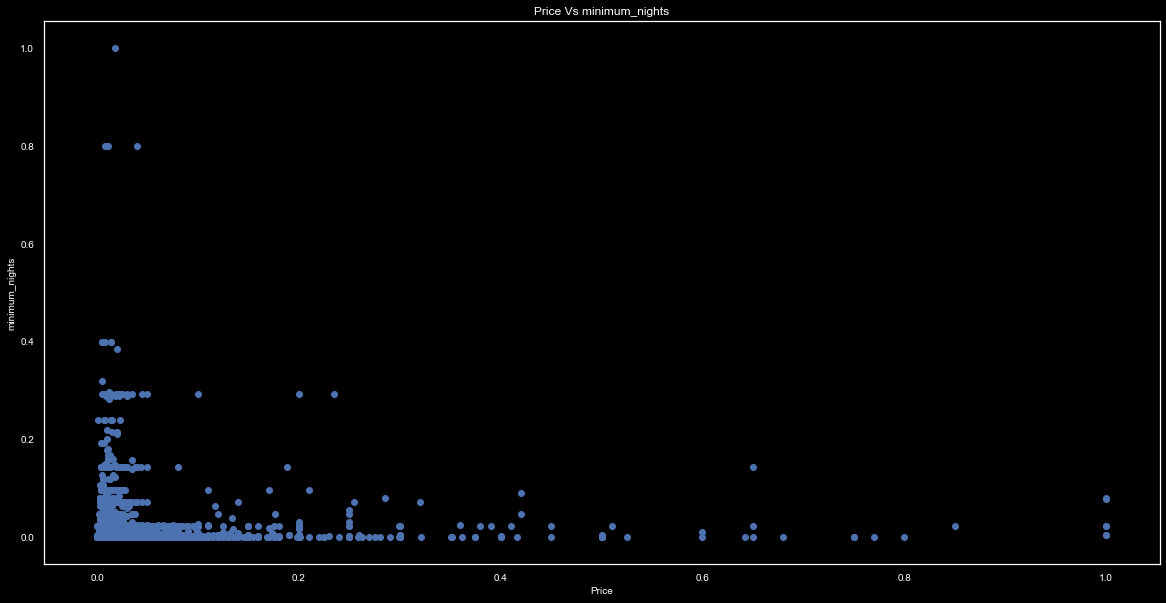

In [0]:
plt.scatter(df_norm['price'],df_norm['minimum_nights'], marker='o')

plt.title("Price Vs minimum_nights")
plt.xlabel("Price")
plt.ylabel("minimum_nights")
plt.show()

- Most hosts don’t require or require a small number of nights
- Those who does require have a small price, so we can say that hosts who establish a minimum number of nights, tend to charge less in price per night

## 5) Evaluate the Results

I hope this Notebook helps to create new hypothesis on how to better use Airbnb platform to achieve your objetive (save money, travel better, etc).

Main findings:

- pay much less staying far from the center and in a private room (with only 20 dólars per night this is possible)

- Most hosts don’t require or require a small number of nights

- Those who does require have a small price, so we can say that hosts who establish a minimum number of nights, tend to charge less in price per night